Based on online book: [Kalman and Bayesian Filters in Python](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python)

## Bayesian Filter

<img src="bproc.png">

### Model

Process:

$$p(x_t | x_{t-1})$$

Measurements:

$$p(z_t | x_t)$$

Initial state (zero-state):

$$p(x_0)$$

Joint probability distribution (example for first 2 steps):

$$p(x_0, x_1, x_2, z_1, z_2) = p(z_2|x_2) \cdot p(x_2|x_1)\cdot p(z_1|x_1)\cdot p(x_1|x_0) \cdot p(x_0) $$

### Algorithm



First mesurement $z_1$ and first state estimate $x_1$:

$$ \color{red}{p(x_1|z_1)} = \frac{1}{p(z_1)} \cdot p(x_1, z_1) = $$
$$ = \frac{1}{p(z_1)} \cdot \int p(x_0, x_1, z_1)~dx_0 = $$
$$ = \frac{1}{p(z_1)} \cdot\int p(z_1|x_1)\cdot p(x_1|x_0) \cdot p(x_0)~dx_0 = $$
$$ = \frac{1}{p(z_1)} \cdot p(z_1|x_1) \cdot \color{green}{\underline{\color{black}{\int p(x_1|x_0) \cdot p(x_0)~dx_0}}} = $$
$$ = \frac{1}{p(z_1)} \cdot p(z_1|x_1) \cdot \color{green}{p(x_1)}$$

Second mesurement $z_2$ and second state estimate $x_2$:

$$ \color{red}{p(x_2|z_2, z_1)} = \frac{1}{p(z_1, z_2)} \cdot p(x_1, z_1, z_2) = $$
$$ = \frac{1}{p(z_1, z_2)} \cdot \int p(z_2|x_2) \cdot p(x_2|x_1)\cdot p(z_1|x_1)\cdot p(x_1)~dx_1 = $$
$$ = \frac{1}{p(z_1, z_2)} \cdot p(z_2|x_2) \cdot \int p(x_2|x_1)\cdot p(z_1|x_1)\cdot p(x_1)~dx_1 = $$
$$ = \frac{p(z_1)}{p(z_1, z_2)} \cdot p(z_2|x_2) \cdot \int p(x_2|x_1)\cdot \color{red}{\frac{1}{p(z_1)} \cdot p(z_1|x_1)\cdot p(x_1)}~dx_1 = $$
$$ = \frac{1}{p(z_2|z_1)} \cdot p(z_2|x_2) \cdot \color{green} {\underline{\color{black}{\int p(x_2|x_1) \cdot }\color{red}{p(x_1|z_1)}~\color{black}{dx_1}}} = $$
$$ = \frac{1}{p(z_2|z_1)} \cdot p(z_2|x_2) \cdot \color{green}{p(x_2|z_1)}$$

Mesurement $z_t$ and state estimate $x_t$:

1. Predict
$$\color{green}{p(x_t|z_{t-1}, .., z_{1})} = \int p(x_t|x_{t-1}) \cdot \color{red}{p(x_{t-1}|z_{t-1}, .., t_1)}~dx_{t-1}$$
2. Update
$$ \color{red}{p(x_t|z_t, z_{t-1}, .., z_1)} = \frac{1}{p(z_t|z_{t-1}, .., z_{1})} \cdot p(z_t|x_t) \cdot \color{green}{p(x_t|z_{t-1}, .., z_{1})}$$

## Simple one-dimensional Kalman filter
### Model

Process:
$$x_t = x_{t-1} + \epsilon, ~ \epsilon \sim N(0, Q)$$
$$p(x_t | x_{t-1}) = N(x_{t-1}, Q)$$

Measurements:
$$z_t = x_t + \eta, ~ \eta \sim N(0, R)$$
$$p(z_t | x_t) = N(x_t, R)$$

Initial state (zero-state):

$$p(x_0) = N(\hat{x}_0, \hat{P}_0)$$


### Algorithm

1. Predict
$$\color{green}{p(x_t|z_{t-1}, .., z_{1})} = \int p(x_t|x_{t-1}) \cdot \color{red}{p(x_{t-1}|z_{t-1}, .., t_1)}~dx_{t-1}$$
$$ = \int N(x_{t-1}, Q) \cdot \color{red}{N(\hat{x}_{t-1}, \hat{P}_{t-1})}~dx_{t-1} = $$
$$ = N(\hat{x}_{t-1}, \hat{P}_{t-1} + Q) = \color{green}{N(\bar{x}, \bar{P})} $$

> $$ \bar{x} = \hat{x}_{t-1} $$
$$ \bar{P} = \hat{P}_{t-1} + Q $$


2. Update
$$ \color{red}{p(x_t|z_t, z_{t-1}, .., z_1)} = \frac{1}{p(z_t|z_{t-1}, .., z_{1})} \cdot \color{blue}{p(z_t|x_t)} \cdot \color{green}{p(x_t|z_{t-1}, .., z_{1})}$$
$$ = \frac{1}{L} \color{blue}{N(x_t, R)\big|_{z_t}} \cdot \color{green}{N(\bar{x},  \bar{P})} = $$
$$ = N\Big( \frac{R \bar{x}+ \bar{P} z_t}{\bar{P} + R}, \frac{\bar{P} R}{(\bar{P}+R)}\Big) = \color{red}{N(\hat{x}_t, \hat{P}_t)}$$

> $$\hat{x}_t = \frac{R \bar{x}+ \bar{P} z_t}{\bar{P} + R}$$
> $$\hat{P}_t = \frac{\bar{P} R}{(\bar{P}+R)}$$

### Algorithm (Kalman form)
1. Predict
> $$ \bar{x} = \hat{x}_{t-1} $$
$$ \bar{P} = \hat{P}_{t-1} + Q $$

2. Update:
> $$ K = \frac{\bar{P}}{\bar{P} + R}$$
> $$\hat{x}_t = \bar{x}+ K(z_t-\bar{x})$$
> $$\hat{P}_t = (1-K)\bar{P}$$


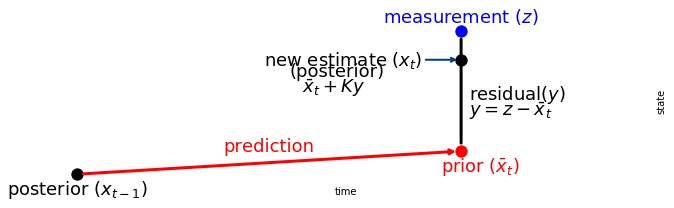

In [1]:
import kf_book.book_plots as book_plots
book_plots.show_residual_chart()

In [2]:
import numpy as np
import pylab as plt

In [3]:
np.random.seed(3)

x_true = 0
Q = 2 # process var
R = 100 # mesurements var

x = 0 # state estimate init
P = 0 # state estimate var init

n_steps = 50
data = {'x_true': [x_true], 'z': [np.nan], 'x_pred': [np.nan], 'x': [x], 'P': [P]}

for k in range(1, n_steps):  
    # ground truth state
    x_true = x_true + np.random.normal() * Q**0.5
    
    # mesurement
    z = x_true + np.random.normal() * R**0.5
    
    # predict step
    x_pred = x + 0
    P = P + Q
    
    # update step
    K = P / (P + R)
    x = x_pred + K * (z - x_pred)
    P = K * R
    
    # save data
    data['x_true'].append(x_true)
    data['z'].append(z)
    data['x_pred'].append(x_pred)
    data['x'].append(x)
    data['P'].append(P)

data = dict([(key, np.array(val)) for key, val in data.items()])

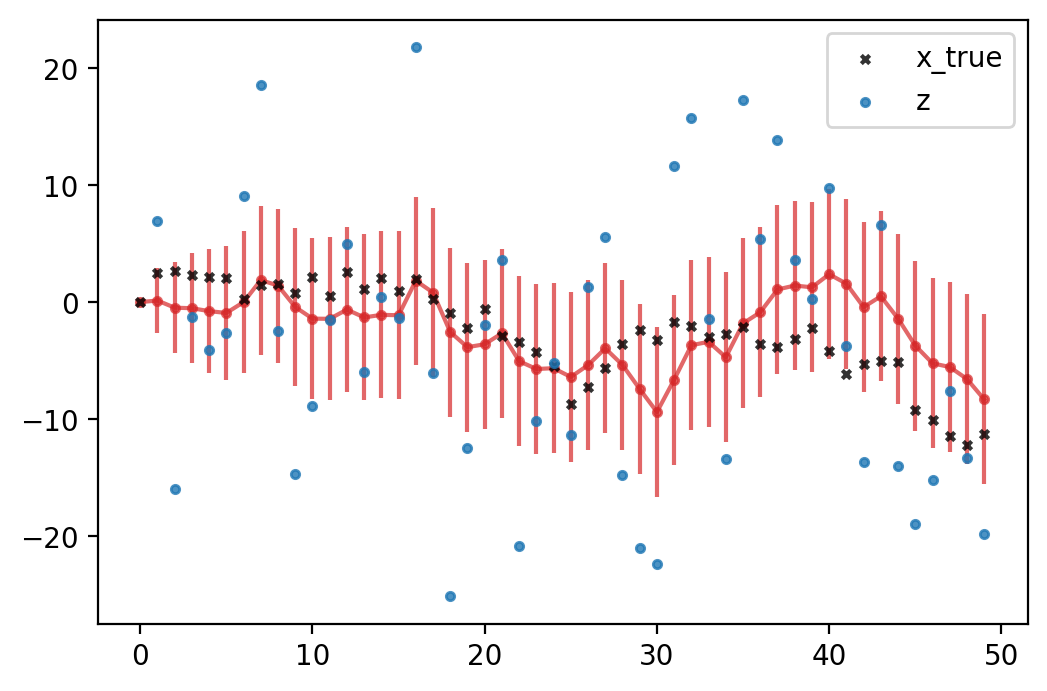

In [5]:
t = np.arange(n_steps)
plt.figure(dpi=200)
plt.scatter(t, data['x_true'], color='k', marker='x', alpha=0.8, s=9, label='x_true')
plt.scatter(t, data['z'], color='C0', marker='.', alpha=0.8, label='z')
# plt.scatter(t, data['x_pred'], color='C2', marker='.', alpha=0.8, label='x_pred')
plt.errorbar(t, data['x'], 2*data['P']**0.5, color='C3', marker='.', alpha=0.7, zorder=-2)
plt.legend()

# Nonlinear case
$$x_t \sim f(x_{t-1})$$
$$z_t \sim g(x_t)$$

mean(x)=-4.00 std(x)=3.00


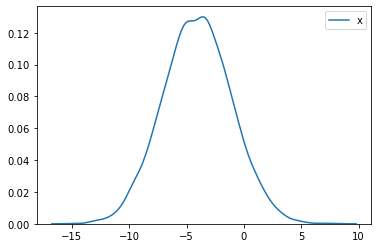

In [6]:
from seaborn import kdeplot
m = -4
std = 3
x = np.random.normal(m, std, size=10000)
kdeplot(x, label='x')
print('mean(x)={:.2f} std(x)={:.2f}'.format(m, std))

In [7]:
h = lambda x: np.sin(x) + np.abs(x)**0.1
z = h(x)

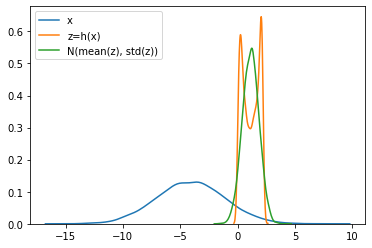

In [8]:
kdeplot(x, label='x')
kdeplot(z, label='z=h(x)')

z_mean = z.mean()
z_std = z.std()
kdeplot(np.random.normal(z_mean, z_std, 10000), label='N(mean(z), std(z))')

In [9]:
w0 = 0.5

sigma_points = np.array([m, m-1/(1-w0)**0.5*std, m+1/(1-w0)**0.5*std])
weights = np.array([w0, (1-w0)/2, (1-w0)/2])
print(sigma_points)
print(weights)


m_s = np.sum(weights*sigma_points)
std_s = np.sum(weights*(sigma_points - m_s)**2)**0.5
print('mean(x)={:.2f} std(x)={:.2f}'.format(m_s, std_s))
print('mean(x)={:.2f} std(x)={:.2f}'.format(m, std))

[-4.         -8.24264069  0.24264069]
[0.5  0.25 0.25]
mean(x)=-4.00 std(x)=3.00
mean(x)=-4.00 std(x)=3.00


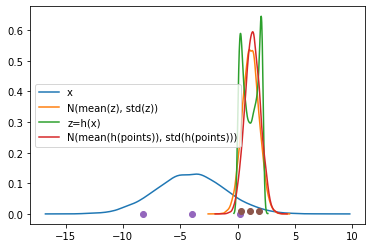

In [10]:
h_sigma_points = h(sigma_points)
h_m_s = np.sum(weights*h_sigma_points)
h_sigma_s = np.sum(weights*(h_sigma_points - h_m_s)**2)**0.5


kdeplot(x, label='x')
kdeplot(np.random.normal(z_mean, z_std, 10000), label='N(mean(z), std(z))')
kdeplot(z, label='z=h(x)')
kdeplot(np.random.normal(h_m_s, h_sigma_s, 10000), label='N(mean(h(points)), std(h(points)))')

plt.plot(sigma_points, sigma_points*0, 'o', label='points')
plt.plot(h_sigma_points, h_sigma_points*0+0.01, 'o', label='h(points)')

In [21]:
sum(weights*(sigma_points - m)**2)**0.5

2.9999999999999996